In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Sales Forecast.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Dropping unnecessery columns

### Customer ID

In [5]:
y = [x[0] for x in df['Customer ID'].str.split('-')]
print(len(set(y)))

292


In [6]:
# Many unique categories present, thus dropping Customer ID

### Row ID , Order ID , Product ID , Customer Name

In [7]:
#Dropping Row ID , Order ID , Product ID , Customer Name because they are not beneficial for prediction by our model

### Country , City and State

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
# Country is common for each record , so will be dropping this column

In [10]:
len(df['City'].unique())

529

In [11]:
len(df['State'].unique())

49

In [12]:
# Will be dropping City and State because Postal Code can individually be used to identify the location

### Product Name

In [13]:
len(df['Product Name'].unique())

1849

In [14]:
# Dropping product Name as well

In [15]:
unnecessery_columns = ['Customer ID' , 'Row ID' , 'Order ID' , 'Product ID' , 'Customer Name' , 'Country' , 'City' , 'State']
df = df.drop(unnecessery_columns,axis=1)

In [16]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Missing Value Handling

In [17]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Postal Code     11
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [18]:
# In EDA , we manually found out the postal code of the records where it was missing as 5401

In [19]:
df['Postal Code'].fillna('5401',inplace=True)

## Handling Duplicate Records

In [20]:
df[df.duplicated()]

,Order Date,Ship Date,Ship Mode,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,Home Office,43229.0,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [21]:
df = df.drop_duplicates()

## Handling Outliers

In [22]:
# In univariate Analysis , we found that only our target column 'Sales' has outliers present
# We are using logarithmic transformation to treat the outliers present

In [23]:
df['Sales_log'] = np.log(df['Sales'])

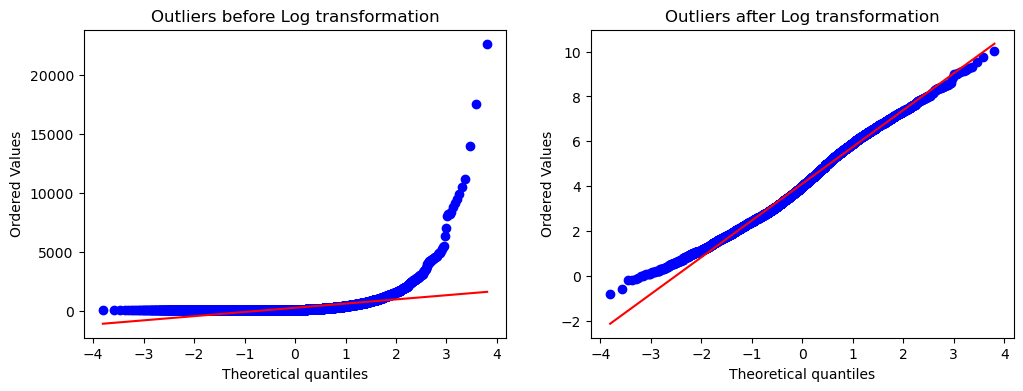

In [24]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
stats.probplot(df['Sales'], dist="norm", plot=ax1)
ax1.set_title('Outliers before Log transformation')
ax2 = fig.add_subplot(122)
stats.probplot(df['Sales_log'],dist="norm", plot=ax2)
ax2.set_title('Outliers after Log transformation')
plt.show()

In [25]:
# The outliers are now treated, so we can proceed with Model Training

## Now converting the Shipping Date and Order Date into Day , Month and Year format

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')  

In [27]:
df.insert(loc=6, column='order_day', value=df['Order Date'].dt.day)
df.insert(loc=7, column='order_month', value=df['Order Date'].dt.month)
df.insert(loc=8, column='order_year', value=df['Order Date'].dt.year)

df.insert(loc=9, column='ship_day', value=df['Ship Date'].dt.day)
df.insert(loc=10, column='ship_month', value=df['Ship Date'].dt.month)
df.insert(loc=11, column='ship_year', value=df['Ship Date'].dt.year)

In [28]:
#Now dropping the original date columns

In [29]:
df = df.drop('Order Date',axis=1)
df = df.drop('Ship Date',axis=1)

## Postal Code Encoding

In [30]:
# Since our postal code is numeric , we just need to convert it into int and then do standardization 

In [31]:
df['Postal Code'] = df['Postal Code'].astype(int)

# Handling Categorical Features

### Ship Mode

In [32]:
#Ranking done on based of frequency(Standard Class has the highest frequency so lowest label given)
ship_mode_categories = ['Standard Class' , 'Second Class' ,'First Class' ,'Same Day']

In [33]:
df.head()

,Ship Mode,Segment,Postal Code,Region,order_day,order_month,order_year,ship_day,ship_month,ship_year,Category,Sub-Category,Product Name,Sales,Sales_log
0,Second Class,Consumer,42420,South,8,11,2017,11,11,2017,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,5.568192
1,Second Class,Consumer,42420,South,8,11,2017,11,11,2017,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,6.595699
2,Second Class,Corporate,90036,West,12,6,2017,16,6,2017,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.682390
3,Standard Class,Consumer,33311,South,11,10,2016,18,10,2016,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6.864407
4,Standard Class,Consumer,33311,South,11,10,2016,18,10,2016,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.107631


### Segment

In [34]:
#Ranking done on based of frequency
segment_categories = ['Consumer' ,'Corporate' , 'Home Office']

### Region

In [35]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [36]:
#Region has almost equal frequencies for sales , so will be using One hot encoding, Since only 4 categories present

### Category

In [37]:
#Ranking done on based of frequency
category_categories = ['Office Supplies' ,'Furniture' , 'Technology']

### Sub Category

In [38]:
#Ranking done on based of frequency
sub_category_categories = ['Binders','Paper','Furnishings','Phones','Storage','Art','Accessories','Chairs','Appliances','Labels','Tables','Envelopes','Bookcases','Fasteners', 'Supplies','Machines',
       'Copiers']

In [39]:
df.head()

,Ship Mode,Segment,Postal Code,Region,order_day,order_month,order_year,ship_day,ship_month,ship_year,Category,Sub-Category,Product Name,Sales,Sales_log
0,Second Class,Consumer,42420,South,8,11,2017,11,11,2017,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,5.568192
1,Second Class,Consumer,42420,South,8,11,2017,11,11,2017,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,6.595699
2,Second Class,Corporate,90036,West,12,6,2017,16,6,2017,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.682390
3,Standard Class,Consumer,33311,South,11,10,2016,18,10,2016,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6.864407
4,Standard Class,Consumer,33311,South,11,10,2016,18,10,2016,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.107631


In [40]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder # One hot Encoding
from sklearn.preprocessing import LabelEncoder #Label Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [41]:
X = df.drop(['Ship Mode','Sales', 'Sales_log'], axis=1)
for col in X.columns:
    if X[col].dtype == 'object':
        label = LabelEncoder()
        X[col] = label.fit_transform(X[col].values)

X = pd.concat([X,df['Ship Mode']],axis=1)
        
y = df['Sales_log']

In [42]:
X.head()

,Segment,Postal Code,Region,order_day,order_month,order_year,ship_day,ship_month,ship_year,Category,Sub-Category,Product Name,Ship Mode
0,0,42420,2,8,11,2017,11,11,2017,0,4,386,Second Class
1,0,42420,2,8,11,2017,11,11,2017,0,5,838,Second Class
2,1,90036,3,12,6,2017,16,6,2017,1,10,1432,Second Class
3,0,33311,2,11,10,2016,18,10,2016,0,16,366,Standard Class
4,0,33311,2,11,10,2016,18,10,2016,1,14,573,Standard Class


## Pipelines created for Categorical Features

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9799 non-null   object 
 1   Segment       9799 non-null   object 
 2   Postal Code   9799 non-null   int32  
 3   Region        9799 non-null   object 
 4   order_day     9799 non-null   int64  
 5   order_month   9799 non-null   int64  
 6   order_year    9799 non-null   int64  
 7   ship_day      9799 non-null   int64  
 8   ship_month    9799 non-null   int64  
 9   ship_year     9799 non-null   int64  
 10  Category      9799 non-null   object 
 11  Sub-Category  9799 non-null   object 
 12  Product Name  9799 non-null   object 
 13  Sales         9799 non-null   float64
 14  Sales_log     9799 non-null   float64
dtypes: float64(2), int32(1), int64(6), object(6)
memory usage: 1.2+ MB


In [44]:
X.head()

,Segment,Postal Code,Region,order_day,order_month,order_year,ship_day,ship_month,ship_year,Category,Sub-Category,Product Name,Ship Mode
0,0,42420,2,8,11,2017,11,11,2017,0,4,386,Second Class
1,0,42420,2,8,11,2017,11,11,2017,0,5,838,Second Class
2,1,90036,3,12,6,2017,16,6,2017,1,10,1432,Second Class
3,0,33311,2,11,10,2016,18,10,2016,0,16,366,Standard Class
4,0,33311,2,11,10,2016,18,10,2016,1,14,573,Standard Class


In [45]:
y.head()

0    5.568192
1    6.595699
2    2.682390
3    6.864407
4    3.107631
Name: Sales_log, dtype: float64

In [46]:
numerical_cols = ['Postal Code','order_day','order_month','order_year','ship_day','ship_month','ship_year']
categorical_cols1 = ['Ship Mode']
categorical_cols2 = ['Region','Segment','Category','Sub-Category','Product Name']

In [47]:
cat_pipeline1=Pipeline(

    steps=[
         ('ordinal_encoder',OrdinalEncoder(categories=[ship_mode_categories])),
         ('scaler',StandardScaler(with_mean=False))
    ]
    
)

In [48]:
cat_pipeline2=Pipeline(

    steps=[
        
         ('scaler',StandardScaler(with_mean=False))
        
    ]
    
)

## Pipeline created for Numerical Features

In [49]:
num_pipeline = Pipeline(

    steps=[
        
        ('scaler',StandardScaler(with_mean=False))
        
    ]


)

In [50]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline1',cat_pipeline1,categorical_cols1),
        ('cat_pipeline2',cat_pipeline2,categorical_cols2)
    ],
    remainder='passthrough'
)

In [51]:
df.head()

,Ship Mode,Segment,Postal Code,Region,order_day,order_month,order_year,ship_day,ship_month,ship_year,Category,Sub-Category,Product Name,Sales,Sales_log
0,Second Class,Consumer,42420,South,8,11,2017,11,11,2017,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,5.568192
1,Second Class,Consumer,42420,South,8,11,2017,11,11,2017,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,6.595699
2,Second Class,Corporate,90036,West,12,6,2017,16,6,2017,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.682390
3,Standard Class,Consumer,33311,South,11,10,2016,18,10,2016,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6.864407
4,Standard Class,Consumer,33311,South,11,10,2016,18,10,2016,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.107631


In [52]:
#sales_cols = ['Sales' , 'Sales_log']
#X = df.drop(sales_cols,axis=1)
#y = df['Sales']

In [53]:
#X.shape

In [54]:
#X_columns = X.columns + '_scaled'
#len(X_columns)

# Data Splitting into Training and Test datasets

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Data Transformation using Pipelines created

In [57]:
X_train_scaled=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test_scaled=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
#X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [58]:
X_train_scaled.head()

,num_pipeline__Postal Code,num_pipeline__order_day,num_pipeline__order_month,num_pipeline__order_year,num_pipeline__ship_day,num_pipeline__ship_month,num_pipeline__ship_year,cat_pipeline1__Ship Mode,cat_pipeline2__Region,cat_pipeline2__Segment,cat_pipeline2__Category,cat_pipeline2__Sub-Category,cat_pipeline2__Product Name
0,2.820964,1.941756,1.219613,1799.691595,2.379042,1.200045,1795.711024,0.000000,2.587591,0.000000,0.000000,0.790587,0.731504
1,1.344337,2.398639,3.353935,1799.691595,2.945480,3.300125,1795.711024,0.000000,0.862530,0.000000,0.000000,0.988234,1.447964
2,2.880517,3.198186,0.304903,1800.583857,3.511919,0.300011,1796.601312,1.080085,2.587591,2.614453,3.173685,0.000000,1.874831
3,1.688685,0.114221,0.609806,1797.907072,0.339863,0.600023,1793.930448,2.160170,0.000000,0.000000,3.173685,0.000000,1.126403
4,1.219416,1.599093,3.658838,1798.799334,2.039179,3.600136,1794.820736,0.000000,1.725061,1.307226,1.586843,0.395294,0.673209


# Model Selection and Training

## Models to be trained

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from catboost import CatBoostRegressor

In [60]:
models ={    
    'Random Forest Regressor' : RandomForestRegressor(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'ElasticNet Regression' : ElasticNet(),
    'Linear Regression' : LinearRegression(),
    'Support Vector Regressor' : SVR(),
    'K Neighbours Regressor' : KNeighborsRegressor(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'AdaBoost Regressor' : AdaBoostRegressor(),
    'Bagging Regressor' : AdaBoostRegressor(),
    'Catboost Regressor' : CatBoostRegressor()
}

## Model Evaluation Function

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [62]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    r2_square  = r2_score(true,predicted)
    
    return mse,mae,r2_square

In [63]:
models.values()

dict_values([RandomForestRegressor(), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), AdaBoostRegressor(), <catboost.core.CatBoostRegressor object at 0x000001CFF6893350>])

In [64]:
for i in range(len(models.keys())):
    model = (list(models.values())[i])
    print(model)

RandomForestRegressor()
Ridge()
Lasso()
ElasticNet()
LinearRegression()
SVR()
KNeighborsRegressor()
DecisionTreeRegressor()
GradientBoostingRegressor()
AdaBoostRegressor()
AdaBoostRegressor()


In [65]:
report_mse = {}
report_mae = {}
report_r2_square = {}
for i in range(len(models.keys())):
    model = (list(models.values())[i])
    model.fit(X_train_scaled,y_train)#Training the model on Train data
    
    y_pred = model.predict(X_test_scaled)#Predictions on test data
    
    mse,mae,r2_square = evaluate_model(y_test,y_pred)
    
    report_mse[list(models.keys())[i]] = mse
    report_mae[list(models.keys())[i]] = mae
    report_r2_square[list(models.keys())[i]] = r2_square
    
    #Printing the accuracy scores
    print("Model Name : " , list(models.keys())[i])
    print("MSE Score : " , mse)
    print("MAE Score : " , mae)
    print("R2 Score : " , r2_square)
    print(" ")
    print("--------------------------")
    

Model Name :  Random Forest Regressor
MSE Score :  0.9197803400884317
MAE Score :  0.7546627101244144
R2 Score :  0.6708565184336119
 
--------------------------
Model Name :  Ridge Regression
MSE Score :  2.6995577217146365
MAE Score :  1.361003850903128
R2 Score :  0.03396301433323334
 
--------------------------
Model Name :  Lasso Regression
MSE Score :  2.7946858143550957
MAE Score :  1.3811772957232558
R2 Score :  -7.858260222648461e-05
 
--------------------------
Model Name :  ElasticNet Regression
MSE Score :  2.7946858143550957
MAE Score :  1.3811772957232558
R2 Score :  -7.858260222648461e-05
 
--------------------------
Model Name :  Linear Regression
MSE Score :  2.69834707602797
MAE Score :  1.3604619138521112
R2 Score :  0.03439624400654251
 
--------------------------
Model Name :  Support Vector Regressor
MSE Score :  2.804514049644394
MAE Score :  1.3766985355259758
R2 Score :  -0.003595617528698636
 
--------------------------
Model Name :  K Neighbours Regressor
MSE

139:	learn: 1.1261389	total: 383ms	remaining: 2.35s
140:	learn: 1.1256194	total: 385ms	remaining: 2.34s
141:	learn: 1.1245450	total: 387ms	remaining: 2.33s
142:	learn: 1.1239722	total: 388ms	remaining: 2.33s
143:	learn: 1.1236132	total: 390ms	remaining: 2.32s
144:	learn: 1.1229957	total: 392ms	remaining: 2.31s
145:	learn: 1.1225177	total: 394ms	remaining: 2.3s
146:	learn: 1.1223108	total: 396ms	remaining: 2.3s
147:	learn: 1.1219580	total: 398ms	remaining: 2.29s
148:	learn: 1.1214895	total: 399ms	remaining: 2.28s
149:	learn: 1.1205667	total: 401ms	remaining: 2.27s
150:	learn: 1.1201012	total: 403ms	remaining: 2.27s
151:	learn: 1.1195983	total: 405ms	remaining: 2.26s
152:	learn: 1.1190414	total: 406ms	remaining: 2.25s
153:	learn: 1.1184737	total: 408ms	remaining: 2.24s
154:	learn: 1.1181258	total: 410ms	remaining: 2.23s
155:	learn: 1.1169301	total: 411ms	remaining: 2.23s
156:	learn: 1.1160398	total: 413ms	remaining: 2.22s
157:	learn: 1.1152521	total: 415ms	remaining: 2.21s
158:	learn: 1.

363:	learn: 1.0065736	total: 774ms	remaining: 1.35s
364:	learn: 1.0062903	total: 776ms	remaining: 1.35s
365:	learn: 1.0059813	total: 778ms	remaining: 1.35s
366:	learn: 1.0057367	total: 780ms	remaining: 1.34s
367:	learn: 1.0054935	total: 782ms	remaining: 1.34s
368:	learn: 1.0051494	total: 784ms	remaining: 1.34s
369:	learn: 1.0046672	total: 785ms	remaining: 1.34s
370:	learn: 1.0044695	total: 787ms	remaining: 1.33s
371:	learn: 1.0040990	total: 789ms	remaining: 1.33s
372:	learn: 1.0035351	total: 791ms	remaining: 1.33s
373:	learn: 1.0033476	total: 793ms	remaining: 1.33s
374:	learn: 1.0031004	total: 794ms	remaining: 1.32s
375:	learn: 1.0024921	total: 796ms	remaining: 1.32s
376:	learn: 1.0021077	total: 798ms	remaining: 1.32s
377:	learn: 1.0019067	total: 800ms	remaining: 1.31s
378:	learn: 1.0014852	total: 801ms	remaining: 1.31s
379:	learn: 1.0010188	total: 803ms	remaining: 1.31s
380:	learn: 1.0006603	total: 805ms	remaining: 1.31s
381:	learn: 1.0003130	total: 807ms	remaining: 1.3s
382:	learn: 1

582:	learn: 0.9407006	total: 1.16s	remaining: 833ms
583:	learn: 0.9403284	total: 1.17s	remaining: 830ms
584:	learn: 0.9401568	total: 1.17s	remaining: 828ms
585:	learn: 0.9397132	total: 1.17s	remaining: 826ms
586:	learn: 0.9393049	total: 1.17s	remaining: 824ms
587:	learn: 0.9389227	total: 1.17s	remaining: 822ms
588:	learn: 0.9387751	total: 1.17s	remaining: 820ms
589:	learn: 0.9385805	total: 1.18s	remaining: 818ms
590:	learn: 0.9384367	total: 1.18s	remaining: 816ms
591:	learn: 0.9381448	total: 1.18s	remaining: 814ms
592:	learn: 0.9377242	total: 1.18s	remaining: 811ms
593:	learn: 0.9374959	total: 1.18s	remaining: 809ms
594:	learn: 0.9373107	total: 1.19s	remaining: 807ms
595:	learn: 0.9370009	total: 1.19s	remaining: 805ms
596:	learn: 0.9367728	total: 1.19s	remaining: 803ms
597:	learn: 0.9366034	total: 1.19s	remaining: 800ms
598:	learn: 0.9364448	total: 1.19s	remaining: 798ms
599:	learn: 0.9360203	total: 1.19s	remaining: 796ms
600:	learn: 0.9356535	total: 1.2s	remaining: 794ms
601:	learn: 0

811:	learn: 0.8866471	total: 1.56s	remaining: 362ms
812:	learn: 0.8865002	total: 1.57s	remaining: 361ms
813:	learn: 0.8863143	total: 1.57s	remaining: 359ms
814:	learn: 0.8861966	total: 1.57s	remaining: 357ms
815:	learn: 0.8860522	total: 1.57s	remaining: 355ms
816:	learn: 0.8858688	total: 1.57s	remaining: 353ms
817:	learn: 0.8857080	total: 1.58s	remaining: 351ms
818:	learn: 0.8855606	total: 1.58s	remaining: 349ms
819:	learn: 0.8854685	total: 1.58s	remaining: 347ms
820:	learn: 0.8853085	total: 1.58s	remaining: 345ms
821:	learn: 0.8849854	total: 1.58s	remaining: 343ms
822:	learn: 0.8848340	total: 1.58s	remaining: 341ms
823:	learn: 0.8847060	total: 1.59s	remaining: 339ms
824:	learn: 0.8844392	total: 1.59s	remaining: 337ms
825:	learn: 0.8842835	total: 1.59s	remaining: 335ms
826:	learn: 0.8840499	total: 1.59s	remaining: 333ms
827:	learn: 0.8837013	total: 1.59s	remaining: 331ms
828:	learn: 0.8835199	total: 1.6s	remaining: 329ms
829:	learn: 0.8834420	total: 1.6s	remaining: 327ms
830:	learn: 0.

In [66]:
report_mse

{'Random Forest Regressor': 0.9197803400884317,
 'Ridge Regression': 2.6995577217146365,
 'Lasso Regression': 2.7946858143550957,
 'ElasticNet Regression': 2.7946858143550957,
 'Linear Regression': 2.69834707602797,
 'Support Vector Regressor': 2.804514049644394,
 'K Neighbours Regressor': 2.3606817149328108,
 'Decision Tree Regressor': 1.5360114294008484,
 'Gradient Boosting Regressor': 1.2628850868399304,
 'AdaBoost Regressor': 1.8531240057049003,
 'Bagging Regressor': 1.8077217999177553,
 'Catboost Regressor': 1.1048588946867597}

In [67]:
report_mae

{'Random Forest Regressor': 0.7546627101244144,
 'Ridge Regression': 1.361003850903128,
 'Lasso Regression': 1.3811772957232558,
 'ElasticNet Regression': 1.3811772957232558,
 'Linear Regression': 1.3604619138521112,
 'Support Vector Regressor': 1.3766985355259758,
 'K Neighbours Regressor': 1.204294642644653,
 'Decision Tree Regressor': 0.956178087749828,
 'Gradient Boosting Regressor': 0.8837791029449944,
 'AdaBoost Regressor': 1.1089411297581522,
 'Bagging Regressor': 1.0934020867807293,
 'Catboost Regressor': 0.8346299562435433}

In [68]:
report_r2_square

{'Random Forest Regressor': 0.6708565184336119,
 'Ridge Regression': 0.03396301433323334,
 'Lasso Regression': -7.858260222648461e-05,
 'ElasticNet Regression': -7.858260222648461e-05,
 'Linear Regression': 0.03439624400654251,
 'Support Vector Regressor': -0.003595617528698636,
 'K Neighbours Regressor': 0.1552298253641815,
 'Decision Tree Regressor': 0.450338164925169,
 'Gradient Boosting Regressor': 0.5480764524051464,
 'AdaBoost Regressor': 0.33685939954607047,
 'Bagging Regressor': 0.353106583174868,
 'Catboost Regressor': 0.6046261401914419}